※ 데이터 불러오기
1) 행안부 > 정책자료 > 주민등록 인구 > 연령별 인구현황 > 월간 & 계(체크) & 남녀구분(체크해제) & 전체읍면동현황(체크) > csv파일 다운로드
2) csv 파일 열기 (한글 꺠진 상태) > 우측 하단 'utf-8' 등 인코딩 선택 > 상단 드롭다운에서 '인코딩하여 다시 열기' > 상단드롭다운에서 'Korean'선택 > 한글 제대로 출력 확인 > 해당 csv 파일 다시 저장


In [57]:
# 라이브러리 및 기본 폰트 설정
from pydataset import data
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
path =  'C:\\Windows\\Fonts\\KoPubDotumLight.ttf'
font = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=font)

In [58]:
# 데이터 불러오기
df = pd.read_csv("./raw data/202404_연령별인구현황_월간.csv", encoding='EUC-KR')
df.head(3)

,행정구역,2024년11월_계_총인구수,2024년11월_계_연령구간인구수,2024년11월_계_0~9세,2024년11월_계_10~19세,2024년11월_계_20~29세,2024년11월_계_30~39세,2024년11월_계_40~49세,2024년11월_계_50~59세,2024년11월_계_60~69세,2024년11월_계_70~79세,2024년11월_계_80~89세,2024년11월_계_90~99세,2024년11월_계_100세 이상
0,서울특별시 (1100000000),"9,335,495","9,335,495","485,522","721,716","1,312,745","1,440,604","1,387,689","1,487,634","1,324,449","770,079","354,527","49,049","1,481"
1,서울특별시 종로구 (1111000000),"138,577","138,577","5,551","9,430","21,060","19,695","18,598","23,413","21,016","11,862","6,815","1,097",40
2,서울특별시 종로구 청운효자동(1111051500),"11,072","11,072",549,"1,016","1,329","1,519","1,774","1,890","1,433",906,561,92,3


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3910 non-null   object
 1   2024년11월_계_총인구수     3910 non-null   object
 2   2024년11월_계_연령구간인구수  3910 non-null   object
 3   2024년11월_계_0~9세     3910 non-null   object
 4   2024년11월_계_10~19세   3910 non-null   object
 5   2024년11월_계_20~29세   3910 non-null   object
 6   2024년11월_계_30~39세   3910 non-null   object
 7   2024년11월_계_40~49세   3910 non-null   object
 8   2024년11월_계_50~59세   3910 non-null   object
 9   2024년11월_계_60~69세   3910 non-null   object
 10  2024년11월_계_70~79세   3910 non-null   object
 11  2024년11월_계_80~89세   3910 non-null   object
 12  2024년11월_계_90~99세   3910 non-null   object
 13  2024년11월_계_100세 이상  3910 non-null   object
dtypes: object(14)
memory usage: 427.8+ KB


In [60]:
# 행정구역별, 나이별 데이터 분리
df = df.rename(columns={"행정구역":"지역명"})
df.head(2)

,지역명,2024년11월_계_총인구수,2024년11월_계_연령구간인구수,2024년11월_계_0~9세,2024년11월_계_10~19세,2024년11월_계_20~29세,2024년11월_계_30~39세,2024년11월_계_40~49세,2024년11월_계_50~59세,2024년11월_계_60~69세,2024년11월_계_70~79세,2024년11월_계_80~89세,2024년11월_계_90~99세,2024년11월_계_100세 이상
0,서울특별시 (1100000000),"9,335,495","9,335,495","485,522","721,716","1,312,745","1,440,604","1,387,689","1,487,634","1,324,449","770,079","354,527","49,049","1,481"
1,서울특별시 종로구 (1111000000),"138,577","138,577","5,551","9,430","21,060","19,695","18,598","23,413","21,016","11,862","6,815","1,097",40


In [61]:
age_cols_1 = [ col for col in df.columns if '세' in col ]
age_cols_1

['2024년11월_계_0~9세',
 '2024년11월_계_10~19세',
 '2024년11월_계_20~29세',
 '2024년11월_계_30~39세',
 '2024년11월_계_40~49세',
 '2024년11월_계_50~59세',
 '2024년11월_계_60~69세',
 '2024년11월_계_70~79세',
 '2024년11월_계_80~89세',
 '2024년11월_계_90~99세',
 '2024년11월_계_100세 이상']

In [62]:
""""혼자 추가 연습코드
age_cols_2 = list(df.columns[3:])
age_cols_2
"""

'"혼자 추가 연습코드\nage_cols_2 = list(df.columns[3:])\nage_cols_2\n'

In [63]:
""" 혼자 추가 연습코드드
for col in age_cols_2:
    df[col] = df[col].astype(int)
df.head(2)
"""

' 혼자 추가 연습코드드\nfor col in age_cols_2:\n    df[col] = df[col].astype(int)\ndf.head(2)\n'

In [64]:
# 값의 , 제거 후 형변환(.astype(int))
for col in age_cols_1:
    df[col] = df[col].str.replace(",","").astype(int)
df.head(2)

,지역명,2024년11월_계_총인구수,2024년11월_계_연령구간인구수,2024년11월_계_0~9세,2024년11월_계_10~19세,2024년11월_계_20~29세,2024년11월_계_30~39세,2024년11월_계_40~49세,2024년11월_계_50~59세,2024년11월_계_60~69세,2024년11월_계_70~79세,2024년11월_계_80~89세,2024년11월_계_90~99세,2024년11월_계_100세 이상
0,서울특별시 (1100000000),"9,335,495","9,335,495",485522,721716,1312745,1440604,1387689,1487634,1324449,770079,354527,49049,1481
1,서울특별시 종로구 (1111000000),"138,577","138,577",5551,9430,21060,19695,18598,23413,21016,11862,6815,1097,40


In [65]:
"""
# 주피터 노트북에서 input 프롬프트 안나오는 현상 해결 시도1 : 되긴 하는데 복잡
import ipywidgets as widgets
from IPython.display import display
input_text = widgets.Text(
    value='',
    placeholder='검색하고 싶은 지역명을 입력하세요: ',
    disabled = False
)
display(input_text)
"""

"\n# 주피터 노트북에서 input 프롬프트 안나오는 현상 해결 시도1 : 되긴 하는데 복잡\nimport ipywidgets as widgets\nfrom IPython.display import display\ninput_text = widgets.Text(\n    value='',\n    placeholder='검색하고 싶은 지역명을 입력하세요: ',\n    disabled = False\n)\ndisplay(input_text)\n"

In [66]:
""" 주피터 노트북에서 input 프롬프트 안나오는 현상 해결 시도2 : 실패
import ipywidgets as interact
print_text = "검색하고 싶은 지역명을 입력하세요 : "
def my_input(text):
    print(f"{text}")
interact(my_input, text="검색하고 싶은 지역명을 입력하세요 : ")
"""

' 주피터 노트북에서 input 프롬프트 안나오는 현상 해결 시도2 : 실패\nimport ipywidgets as interact\nprint_text = "검색하고 싶은 지역명을 입력하세요 : "\ndef my_input(text):\n    print(f"{text}")\ninteract(my_input, text="검색하고 싶은 지역명을 입력하세요 : ")\n'

In [67]:
""" 주피터 노트북에서 input 프름프트 : 창 최상단에 생성됨 확인"""
a = input('입력값 : ')
print("입력값 : ", a)

입력값 :  종로구


In [68]:
# 지역명 필터링
region_name = input('검색하고 싶은 지역명을 입력하세요: ')
# region_name = "용산구"
region_df = df[ df["지역명"].str.contains(region_name, na=False)]
# .contains() : 문자열 데이터 필터링, (특정 문자열 찾을때)
# na : 결측값 포함 여부
# case : 대소문자 구분 여부

# 지역명이 목록에 없을때 알림
if region_df.empty :        # df가 비었을때
    print(f"{region_name}의 지역은 존재하지 않습니다.")

In [69]:
"""혼자 추가 연습코드
# 컬럼명에 나이범위로만 표시되도록 변경
df.columns = df.columns.str.replace("2024년11월_계_", "")
df.head(2)
"""

'혼자 추가 연습코드\n# 컬럼명에 나이범위로만 표시되도록 변경\ndf.columns = df.columns.str.replace("2024년11월_계_", "")\ndf.head(2)\n'

In [70]:
# 지역명이 목록에 있을때 데이터 추출(출력)
age_groups = [ col.split("_계_")[1] for col in age_cols_1]
age_groups

['0~9세',
 '10~19세',
 '20~29세',
 '30~39세',
 '40~49세',
 '50~59세',
 '60~69세',
 '70~79세',
 '80~89세',
 '90~99세',
 '100세 이상']

In [71]:
result = region_df[age_cols_1].iloc[0].values
result

array([ 5551,  9430, 21060, 19695, 18598, 23413, 21016, 11862,  6815,
        1097,    40])

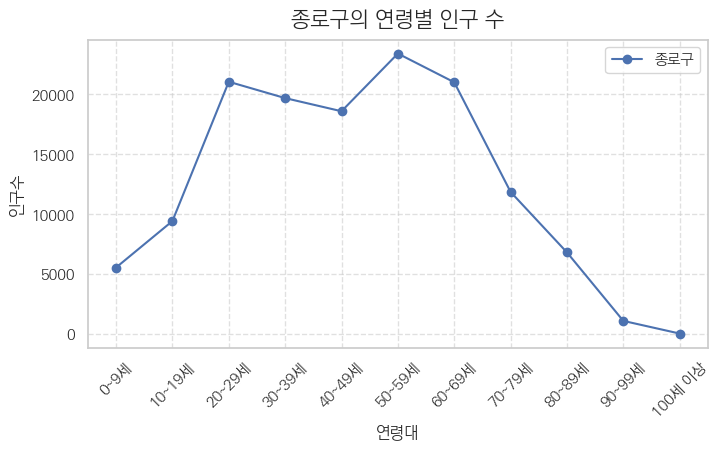

In [72]:
# 그래프 그리기
plt.figure(figsize=(8,4))
plt.plot(age_groups, result, marker="o", label=region_name)
plt.title(f"{region_name}의 연령별 인구 수", fontsize=16, pad=10)
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.legend()


※ 데이터 불러오기
1) 행안부 > 정책자료 > 주민등록 인구 > 연령별 인구현황 > 월간 & 계(체크해제) & 남녀구분(체크) & 전체읍면동현황(체크) > csv파일 다운로드
2) csv 파일 열기 (한글 꺠진 상태) > 우측 하단 'utf-8' 등 인코딩 선택 > 상단 드롭다운에서 '인코딩하여 다시 열기' > 상단드롭다운에서 'Korean'선택 > 한글 제대로 출력 확인 > 해당 csv 파일 다시 저장


In [73]:
# 라이브러리 및 기본 폰트 설정
from pydataset import data
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
path =  'C:\\Windows\\Fonts\\KoPubDotumLight.ttf'
font = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=font)

In [74]:
df = pd.read_csv("./raw data/202404_연령별인구현황.csv", encoding='EUC-KR')
df.head(2)

,행정구역,2024년04월_남_총인구수,2024년04월_남_연령구간인구수,2024년04월_남_0~9세,2024년04월_남_10~19세,2024년04월_남_20~29세,2024년04월_남_30~39세,2024년04월_남_40~49세,2024년04월_남_50~59세,2024년04월_남_60~69세,...,2024년04월_여_10~19세,2024년04월_여_20~29세,2024년04월_여_30~39세,2024년04월_여_40~49세,2024년04월_여_50~59세,2024년04월_여_60~69세,2024년04월_여_70~79세,2024년04월_여_80~89세,2024년04월_여_90~99세,2024년04월_여_100세 이상
0,서울특별시 (1100000000),"4,532,115","4,532,115","257,434","373,543","636,314","714,841","696,275","735,836","626,231",...,"357,633","709,084","714,198","710,914","761,215","697,000","409,623","206,245","34,438","1,155"
1,서울특별시 종로구 (1111000000),"67,138","67,138","2,901","4,730","10,147","9,675","9,183","11,682","10,502",...,"4,996","11,411","9,758","9,765","12,033","10,450","6,315","4,029",691,30


In [75]:
# df.info()       # dtypes: int64(1), object(26)

In [76]:
# 데이터 형변환
cols = df.select_dtypes(include='object').columns[1:]
for col in cols :
    df[col] = df[col].str.replace(",", "").astype(int)
df.info()           # dtypes: int64(26), object(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3909 non-null   object
 1   2024년04월_남_총인구수     3909 non-null   int64 
 2   2024년04월_남_연령구간인구수  3909 non-null   int64 
 3   2024년04월_남_0~9세     3909 non-null   int64 
 4   2024년04월_남_10~19세   3909 non-null   int64 
 5   2024년04월_남_20~29세   3909 non-null   int64 
 6   2024년04월_남_30~39세   3909 non-null   int64 
 7   2024년04월_남_40~49세   3909 non-null   int64 
 8   2024년04월_남_50~59세   3909 non-null   int64 
 9   2024년04월_남_60~69세   3909 non-null   int64 
 10  2024년04월_남_70~79세   3909 non-null   int64 
 11  2024년04월_남_80~89세   3909 non-null   int64 
 12  2024년04월_남_90~99세   3909 non-null   int64 
 13  2024년04월_남_100세 이상  3909 non-null   int64 
 14  2024년04월_여_총인구수     3909 non-null   int64 
 15  2024년04월_여_연령구간인구수  3909 non-null   int64 
 16  2024년04월_여_0~9세     3909

In [77]:
# 데이터 분리 (남:M 여:F)
male_cols = [0] + list(range(3, 14))     # 남 : [0, 3~13]
female_cols = [0] + list(range(16, 27))     # 여 : [0, 16~26]
print(male_cols, '\n', female_cols)

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] 
 [0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [78]:
df_M = df.iloc[:, male_cols]
df_F = df.iloc[:, female_cols]
df_M.shape, df_F.shape      # ((3909, 12), (3909, 12))

((3909, 12), (3909, 12))

In [79]:

# 컬럼명 변경
df_M.columns=df_M.columns.str.replace("2024년04월_남_","")
df_F.columns=df_F.columns.str.replace("2024년04월_여_","")
# df_M.head(2)

In [80]:
df_M.head(2)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),257434,373543,636314,714841,696275,735836,626231,338168,140478,12647,348
1,서울특별시 종로구 (1111000000),2901,4730,10147,9675,9183,11682,10502,5294,2679,334,11


In [81]:
df_F.head(2)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),244649,357633,709084,714198,710914,761215,697000,409623,206245,34438,1155
1,서울특별시 종로구 (1111000000),2816,4996,11411,9758,9765,12033,10450,6315,4029,691,30


In [82]:
# 지역 필터링
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# region_input = input("검색하고 싶은 지역명을 입력하세요 : ")      # input함수 실행 불가능
region = "용산구"
filtered_df_M = df_M[ df_M['행정구역'].str.contains(region, na=True) ].iloc[0]
filtered_df_F = df_F[ df_F['행정구역'].str.contains(region, na=True) ].iloc[0]


In [83]:
filtered_df_M.head(2)

행정구역    서울특별시 용산구 (1117000000)
0~9세                      5426
Name: 35, dtype: object

In [84]:
filtered_df_F.head(2)

행정구역    서울특별시 용산구 (1117000000)
0~9세                      5244
Name: 35, dtype: object

In [85]:
data_filtered = pd.DataFrame({"남": filtered_df_M, "여" : filtered_df_F}).iloc[1:]
data_filtered

,남,여
0~9세,5426,5244
10~19세,6778,6578
20~29세,13181,15840
30~39세,18125,18515
40~49세,15043,15393
50~59세,16350,17112
60~69세,14035,14696
70~79세,6823,8559
80~89세,3362,5411
90~99세,425,1013


Text(0.5, 1.0, '용산구 남여별 연령대별 인구수')

c:\Users\praye\anaconda3\envs\kdt_energy1_1\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\praye\anaconda3\envs\kdt_energy1_1\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\praye\anaconda3\envs\kdt_energy1_1\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\praye\anaconda3\envs\kdt_energy1_1\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\praye\anaconda3\envs\kdt_energy1_1\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\praye\anaconda3\envs\kdt_energy1

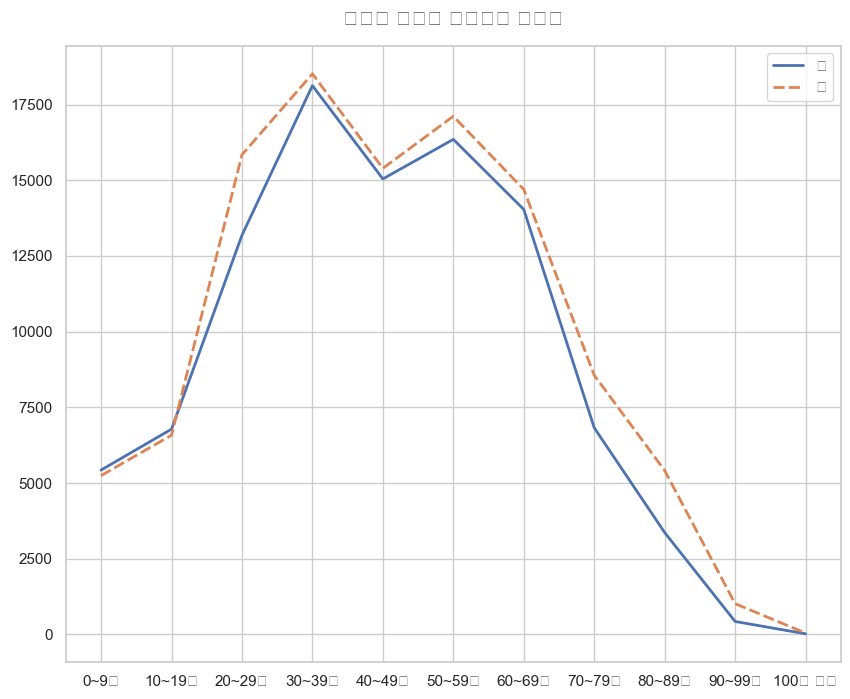

In [86]:
# 그래프 그리기

plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')
sns.lineplot(data=data_filtered, linewidth=2)
plt.title(f"{region} 남여별 연령대별 인구수", fontsize=15, pad=15)


In [87]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data, index=[10, 20, 30, 40, 50])

# 데이터프레임을 길게 변환
df_melted = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_melted

,index,variable,value
0,10,A,1
1,20,A,2
2,30,A,3
3,40,A,4
4,50,A,5
5,10,B,5
6,20,B,4
7,30,B,3
8,40,B,2
9,50,B,1


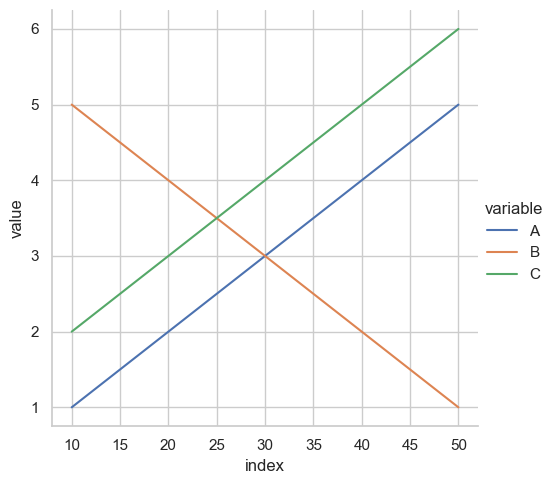

In [88]:

# 꺾은선 그래프 생성
sns.relplot(data=df_melted, x='index', y='value', hue='variable', kind='line')

# 그래프 표시
plt.show()


1. melted table 시각화

In [89]:
# 1) melted data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': [9, 10, 11, 12, 13]
}
df = pd.DataFrame(data)

# 데이터를 Melt 형태로 변환
melted_df = pd.melt(df, var_name='Variable', value_name='Value')
melted_df

,Variable,Value
0,A,1
1,A,2
2,A,3
3,A,4
4,A,5
5,B,5
6,B,6
7,B,7
8,B,8
9,B,9


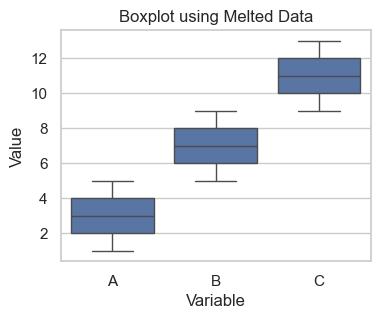

<Figure size 200x200 with 0 Axes>

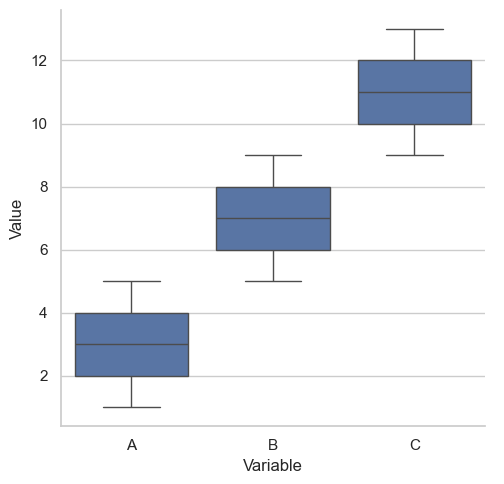

In [90]:

# Boxplot 생성  ㅡ  sns.boxplot(x=범주형변수명, y=수치형변수, data=melted_df)
plt.figure(figsize=(4, 3))
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot using Melted Data')
plt.show()
plt.figure(figsize=(2, 2))
sns.catplot(x='Variable', y='Value', data=melted_df, kind='box')


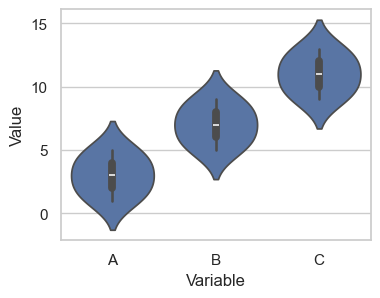

<Figure size 200x200 with 0 Axes>

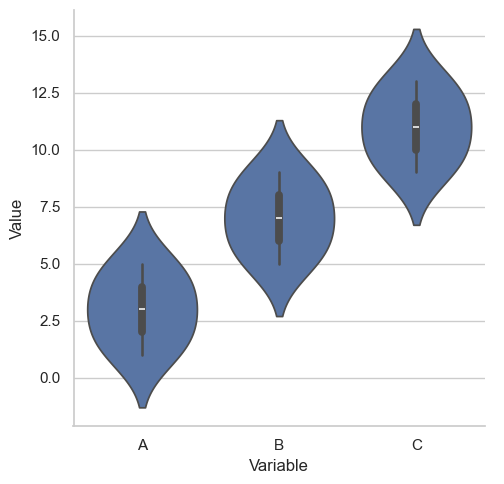

In [91]:
# Boxplot 생성  ㅡ  sns.violinplot(x=범주형변수명, y=수치형변수, data=melted_df)
plt.figure(figsize=(4, 3))
sns.violinplot(x='Variable', y='Value', data=melted_df)
plt.figure(figsize=(2, 2))
sns.catplot(x='Variable', y='Value', data=melted_df, kind="violin")


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Sales_A': [100, 150, 200, 250, 300],
    'Sales_B': [80, 130, 180, 230, 280]
}
df = pd.DataFrame(data)

# 데이터를 Melt 형태로 변환
melted_df = pd.melt(df, id_vars='Year', var_name='Product', value_name='Sales')
melted_df

,Year,Product,Sales
0,2020,Sales_A,100
1,2021,Sales_A,150
2,2022,Sales_A,200
3,2023,Sales_A,250
4,2024,Sales_A,300
5,2020,Sales_B,80
6,2021,Sales_B,130
7,2022,Sales_B,180
8,2023,Sales_B,230
9,2024,Sales_B,280


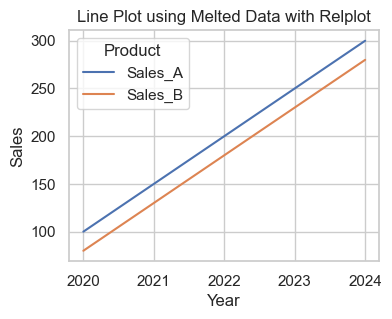

<Figure size 400x300 with 0 Axes>

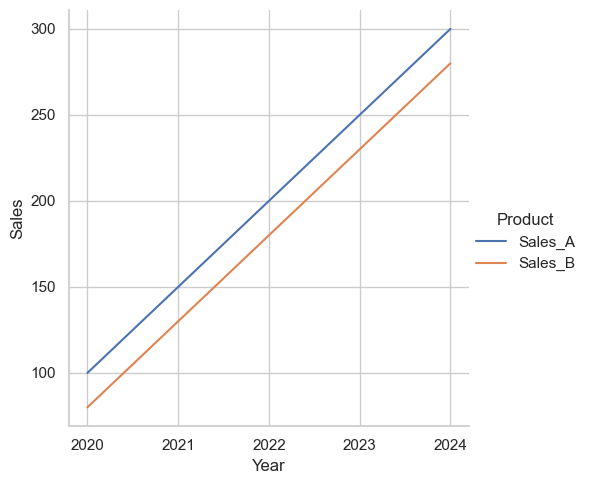

In [93]:

# Relplot으로 꺾은선 그래프 생성
plt.figure(figsize=(4, 3))
sns.lineplot(x='Year', y='Sales', hue='Product', data=melted_df)
plt.title('Line Plot using Melted Data with Relplot')

plt.figure(figsize=(4, 3))
sns.relplot(x='Year', y='Sales', hue='Product', kind='line', data=melted_df)


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성 (범주형 변수 추가)
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Year': [2020, 2021, 2022, 2023, 2024, 2025],
    'Sales_A': [100, 150, 200, 250, 300, 350],
    'Sales_B': [80, 130, 180, 230, 280, 330]
}
df = pd.DataFrame(data)

# 피벗 테이블 생성
pivot_df = df.pivot_table(index='Year', values=['Sales_A', 'Sales_B'], aggfunc='mean').reset_index()
pivot_df

,Year,Sales_A,Sales_B
0,2020,100.0,80.0
1,2021,150.0,130.0
2,2022,200.0,180.0
3,2023,250.0,230.0
4,2024,300.0,280.0
5,2025,350.0,330.0


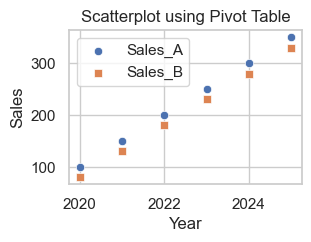

Text(0.5, 1.0, 'Scatterplot Before changing type of "Year')

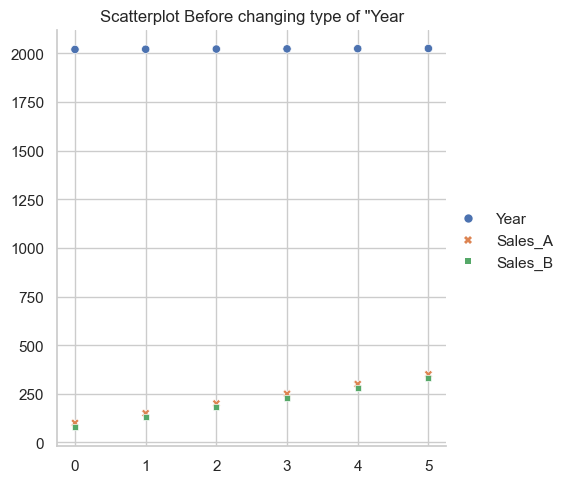

In [95]:

# Scatterplot 생성
plt.figure(figsize=(3, 2))
sns.scatterplot(data=pivot_df, x='Year', y='Sales_A')
sns.scatterplot(data=pivot_df, x='Year', y='Sales_B', marker='s')
plt.title('Scatterplot using Pivot Table')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Sales_A', 'Sales_B'])
plt.show()

sns.relplot(data=pivot_df, marker='s')
plt.title('Scatterplot Before changing type of "Year')


Text(0.5, 1.0, 'Scatterplot After changing type of "Year')

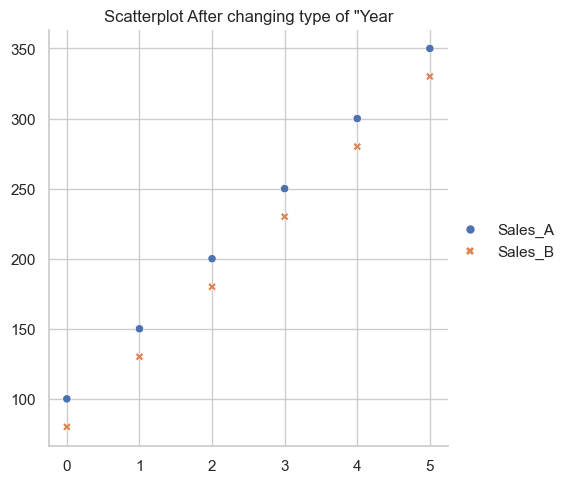

In [96]:

pivot_df['Year'] = pivot_df['Year'].astype('str')
sns.relplot(data=pivot_df, marker='s')
plt.title('Scatterplot After changing type of "Year')

2. pivot table 시각화

In [97]:
# pivot table
data = {
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Value1': [1, 2, 3, 4, 5],
    'Value2': [5, 6, 7, 8, 9]
}
df = pd.DataFrame(data)

# 피벗 테이블 생성
pivot_df = df.pivot_table(index='Category', values=['Value1', 'Value2'])
pivot_df


,Value1,Value2
Category,,
A,1.5,5.5
B,3.5,7.5
C,5.0,9.0


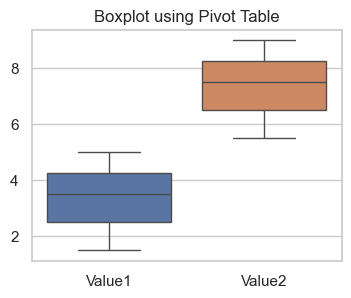

<Figure size 400x300 with 0 Axes>

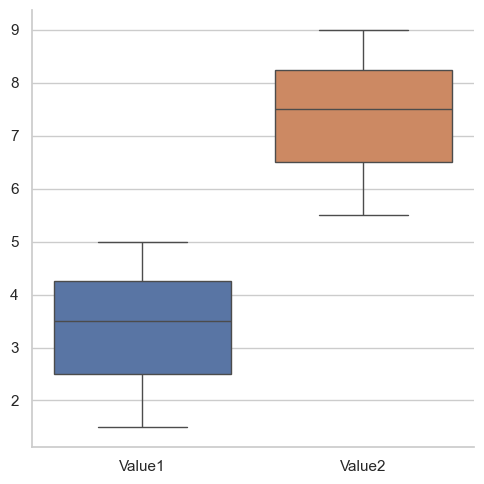

In [98]:

# Boxplot 생성 ㅡ sns.boxplot(data=pivot_df)
plt.figure(figsize=(4, 3))
sns.boxplot(data=pivot_df)
plt.title('Boxplot using Pivot Table')
plt.figure(figsize=(4, 3))
sns.catplot(data=pivot_df, kind='box')


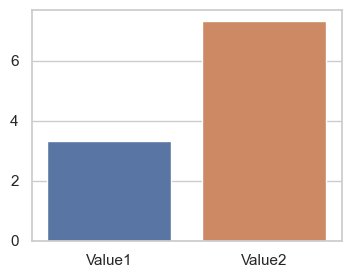

<Figure size 400x300 with 0 Axes>

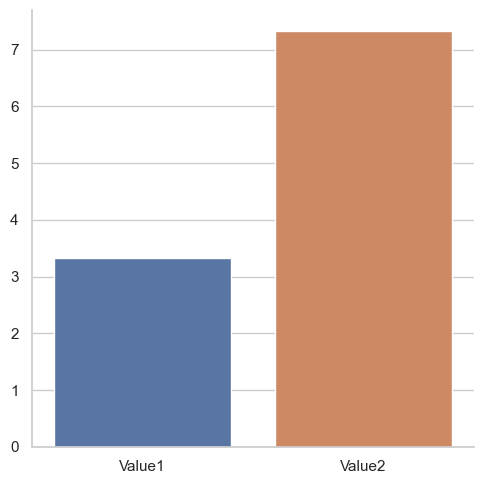

In [99]:
# Barplot 생성 ㅡ sns.barplot(data=pivot_df)
plt.figure(figsize=(4, 3))
sns.barplot(data=pivot_df, errorbar=None)
plt.figure(figsize=(4, 3))
sns.catplot(data=pivot_df, kind="bar",errorbar=None)

In [100]:
# 예제 데이터프레임 생성 (범주형 변수 추가)
data = {
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Sales_A': [100, 150, 200, 250, 300],
    'Sales_B': [80, 130, 180, 230, 280]
}
df = pd.DataFrame(data)

# 피벗 테이블 생성
pivot_df = df.pivot_table(index='Year', values=['Sales_A', 'Sales_B'], aggfunc='mean')
pivot_df

,Sales_A,Sales_B
Year,,
2020,100.0,80.0
2021,150.0,130.0
2022,200.0,180.0
2023,250.0,230.0
2024,300.0,280.0


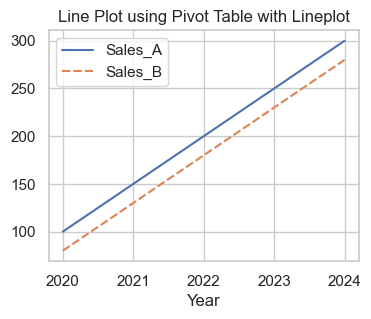

<Figure size 400x300 with 0 Axes>

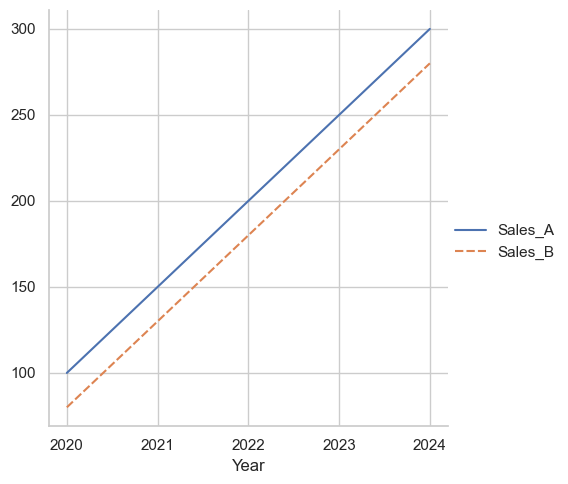

In [101]:

# Lineplot으로 꺾은선 그래프 생성
plt.figure(figsize=(4, 3))
sns.lineplot(data=pivot_df)
plt.title('Line Plot using Pivot Table with Lineplot')

plt.figure(figsize=(4, 3))
sns.relplot(data=pivot_df, kind='line')


Text(0.5, 1.0, 'Heatmap using Pivot Table')

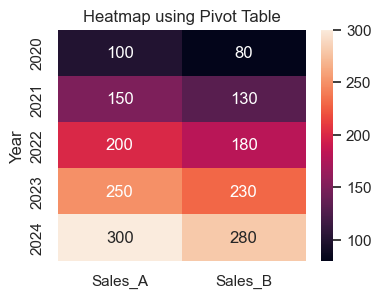

In [102]:
# Heatmap 생성 ㅡ sns.heatmap(pivot_df, annot=T/F, fmt='d/.2f%% ...')
plt.figure(figsize=(4, 3))
sns.heatmap(pivot_df, annot=True, fmt=".0f")
plt.title('Heatmap using Pivot Table')



In [103]:
df= sns.load_dataset('iris')
df.shape,       # ((150, 5),)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [104]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Figure size 400x300 with 0 Axes>

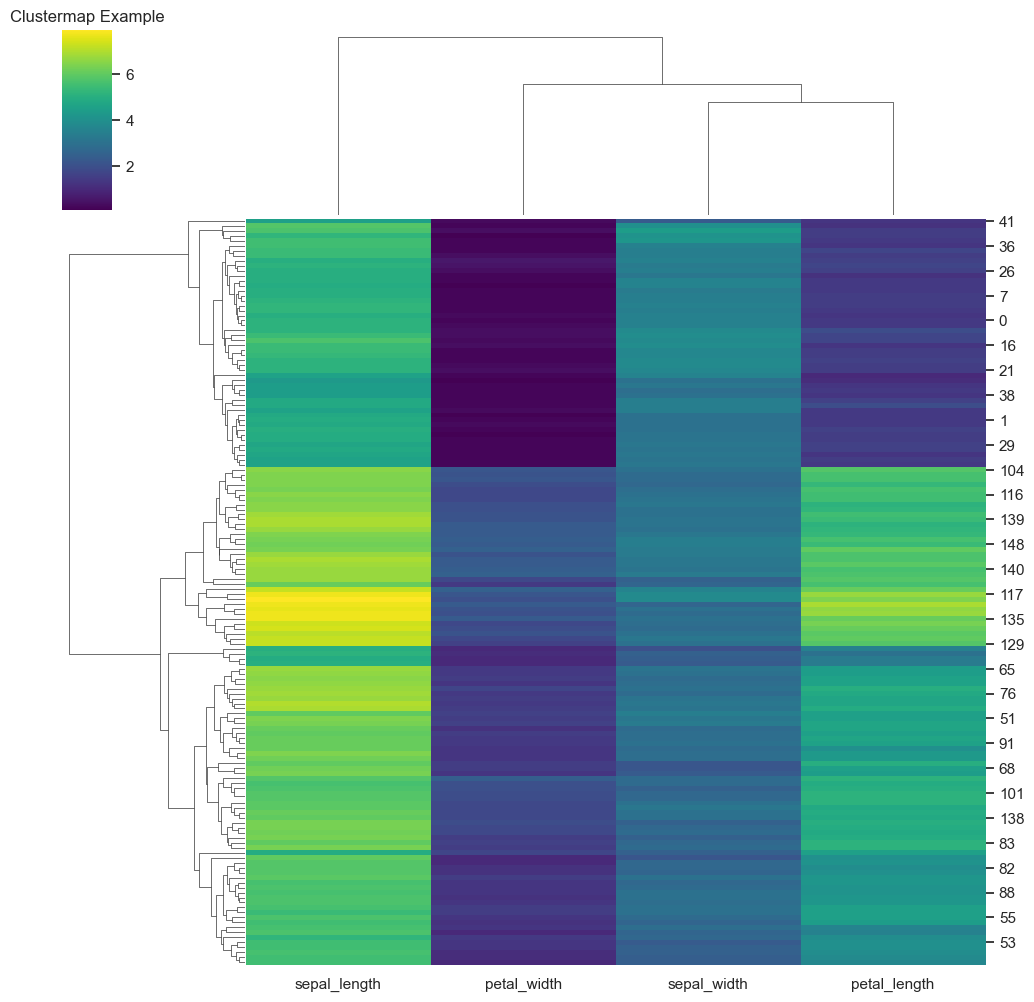

In [105]:
# clustermap
# !pip install scipy
import scipy
plt.figure(figsize=(4,3))
sns.clustermap(df.drop(columns=['species']), metric='euclidean', method='average', cmap='viridis')
plt.title('Clustermap Example')
plt.show()


<Figure size 800x600 with 0 Axes>

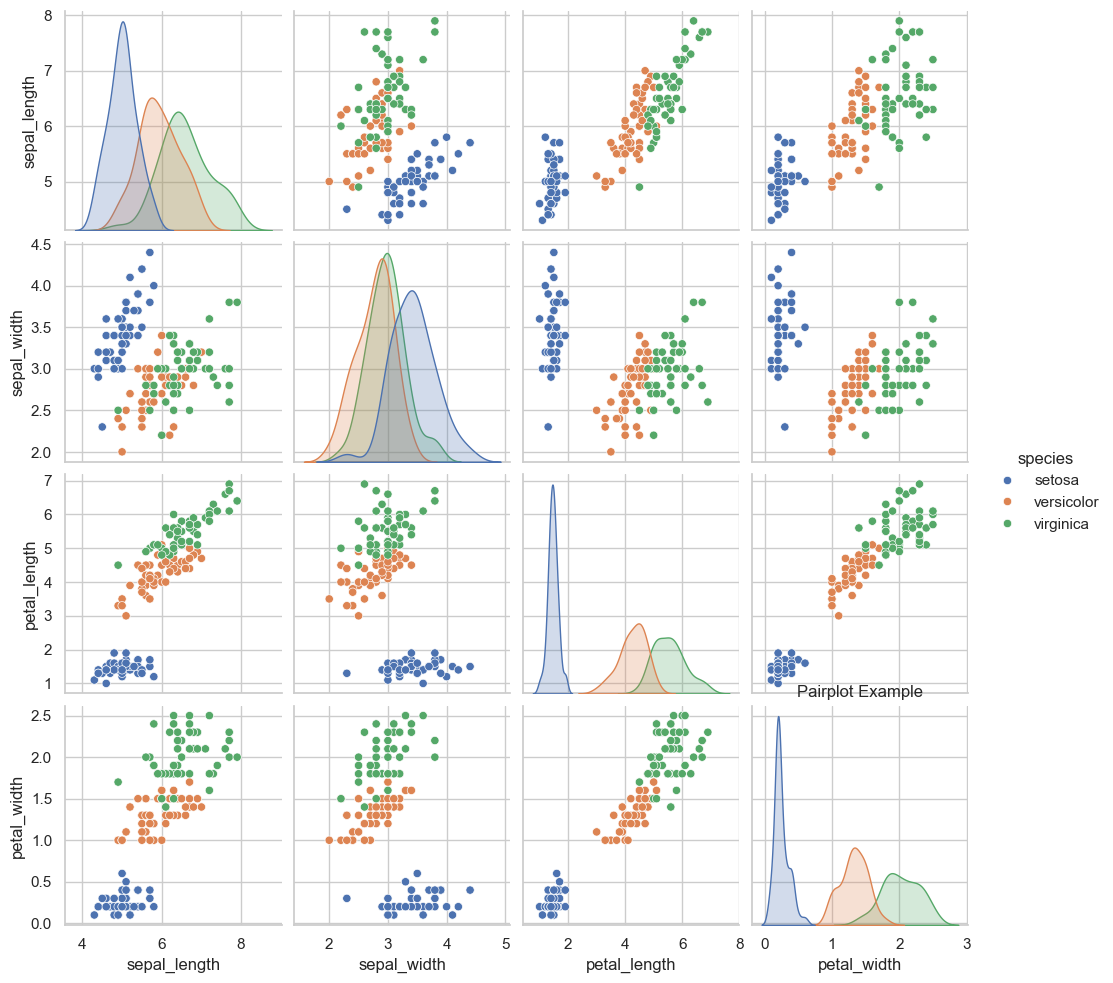

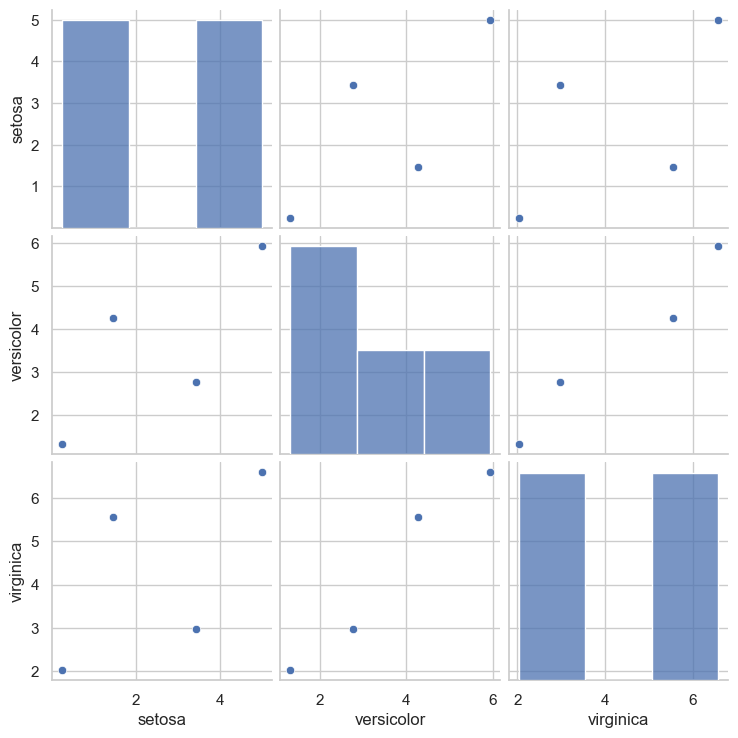

In [106]:
# pairplot    ㅡ  sns.pairplot(melted_df, hue="범주변수명")  ㅡ 
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='species')
plt.title('Pairplot Example')

# plt.figure(figsize=(8, 6))
# sns.relplot(df, hue='species')
pivot_df = df.pivot_table(columns='species')
sns.pairplot(pivot_df)


<Figure size 800x600 with 0 Axes>

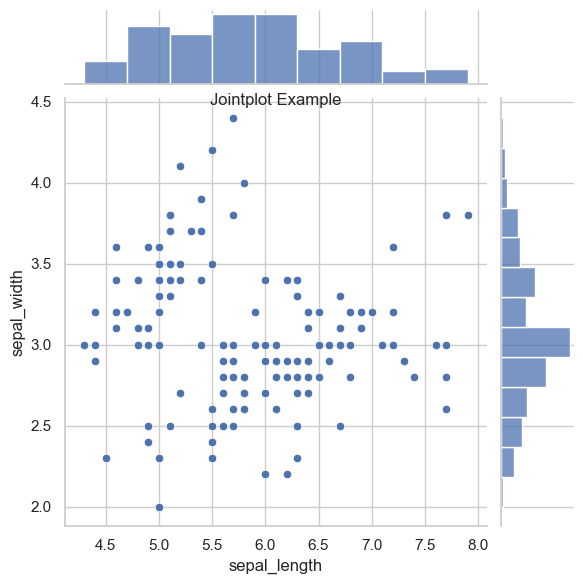

<Figure size 800x600 with 0 Axes>

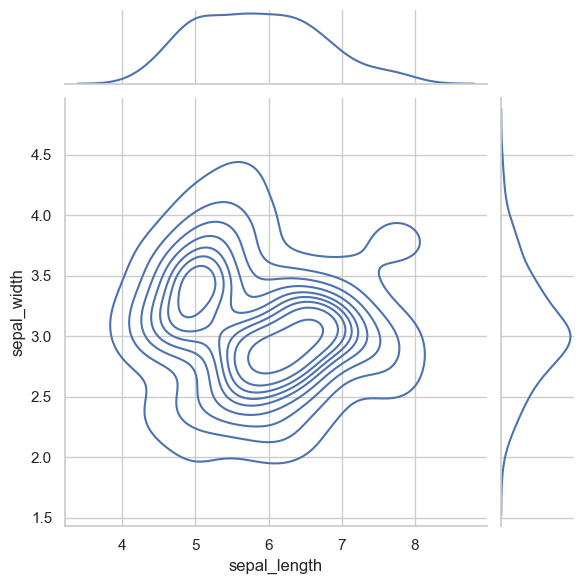

<Figure size 800x600 with 0 Axes>

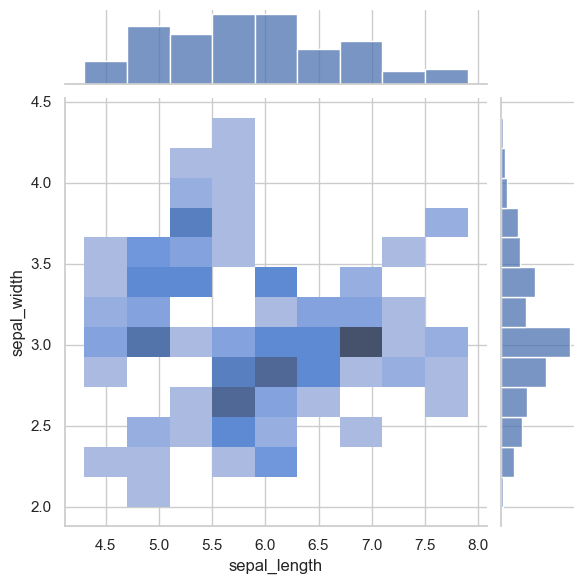

In [107]:
plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='scatter')
plt.title('Jointplot Example', pad=-5)
plt.show()

plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='kde')

plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='hist')

